In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.stats import kurtosis


## Loading

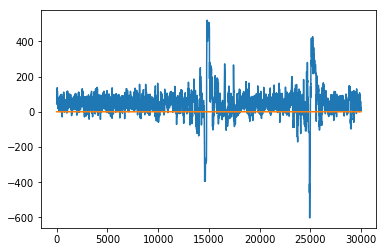

In [4]:
"""
purpose: parse raw data/label file, return data as numpy array
"""

def parse_file(dataFileName):
    f=open(dataFileName)
    strL=f.read()
    l=ast.literal_eval(strL)
    return np.array(l)

def plotData(data):
    plt.plot([x[0] for x in data])
    plt.plot([x[2] for x in data])#poor_signal
    return

#Test
dataFileName='signal_data\signal03_11_2019__10_43_51.txt'
postData=parse_file(dataFileName)
plotData(postData)
    

  

## Filtering
### eyeblinks, band pass filter

In [ ]:
"""
purpose: find the indeces of trails that possibly contaminated by eyeblinks
"""
def eyeblink_identifier(brainwave_vec, window_interval,num_of_trials, moving_step, rejection_std):
    kurtosis_vec = np.array([])
    idx =0
    while (idx < brainwave_vec.size-window_interval):
        np.append(kurtosis, kurtosis(brainwave_vec[idx:idx+window_interval]))
        idx += moving_step
    kurtosis_thres = np.mean(kurtosis_vec)+ rejection_std*np.std(kurtosis_vec)
    bad_kurtosis_index = kurtosis_vec > kurtosis_thres
    
    num_windows_per_trial = (brainwave_vec.size-window_interval)/ moving_step+1
    bad_trial_index = []
    
    for i in range(0,kurtosis_vec.size):
        if (bad_kurtosis_index[i] == True):
            bad_train_index.append(np.floor(i/(1.0*num_windows_pertrial)))
    
    return np.unique(bad_trial_index)

"""
purpose: find the indices of trials that have bad connection
"""

def bad_connection_identifier(stimuli_per_trial,num_of_trials, connection_quality_vec,rejection_rate):
    bad_trial_index =[]
    for i in range(0, num_of_trials-1):
        bad_sum = 0
        for j in range(i*stimuli_per_trial,(i+1)*stimuli_per_trial):
            if (connection_quality_vec[j] > tres):
                bad_sum += 1
        if (bad_sum/(1.0)*stimuli_per_trial > rejection_rate):
            bad_trial_index.append(i)
            
    return np.array(bad_trial_index)
            

## Processing
### Chop the data into trials, discard bad trials, average trails with the same stimuli

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


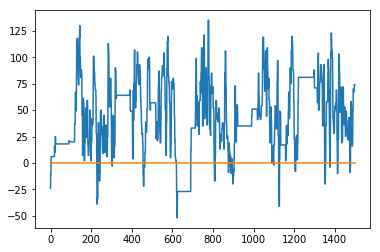

In [32]:
f="signal_data\signal03_11_2019__10_57_39.txt" #signal data
g="stimuli_data\stimuli03_11_2019__10_57_39.txt" #stimuli stamp

#signalFile format: (outputlevel, timestamp, quality)
#stimuliFile format: (pictureIndex,condition,timestamp)
#output format: 2d tuple with each elment as a sample, each sample a point of signalFile format
def sync( signalFile, stimuliFile, scope):
    f=parse_file(signalFile)
    g=parse_file(stimuliFile)
    out=[]
    temp=[]
    for i in g:
        temp=[]
        for j in f:
            if j[1]>i[2] and j[1]<i[2]+scope:
                temp.append(j)
        out.append(temp)
    return out

#Test
res=sync(f,g,1.5)
plotData(res[0])

def getLabel(stimuliFile):
    out=[]
    g=parse_file(stimuliFile)
    for x in g:
       out.append(int(x[1]))
    return out

#Test
print(getLabel(g)) 
    
            

## Classification